In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset Exploration

In [ ]:
wine = pd.read_csv('/content/gdrive/MyDrive/winemag-data-130k-v2.csv') #SN
#wine = pd.read_csv("winemag-data-130k-v2.csv")
#wine = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DSCI 591/winemag-data-130k-v2.csv')
#wine = pd.read_csv('/content/gdrive/MyDrive/Drexel/winemag-data-130k-v2.csv')  #AS

In [18]:
#Basic info about the dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118971 entries, 0 to 129970
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                118912 non-null  object 
 1   description            118971 non-null  object 
 2   designation            84670 non-null   object 
 3   points                 118971 non-null  int64  
 4   price                  110706 non-null  float64
 5   province               118912 non-null  object 
 6   region_1               99474 non-null   object 
 7   region_2               46626 non-null   object 
 8   taster_name            94196 non-null   object 
 9   taster_twitter_handle  89672 non-null   object 
 10  title                  118971 non-null  object 
 11  variety                118970 non-null  object 
 12  winery                 118971 non-null  object 
 13  points_transformed     118971 non-null  float64
 14  point_range            118971 non-nu

In [ ]:
#First few rows of the raw data
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
#Basic stats for the numeric attributes
wine.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [ ]:
#Remove duplicate reviews and drop Unnamed: 0 since this is just a meaningless index column
wine = wine.drop_duplicates(subset=['taster_name', 'title'])
wine = wine.drop("Unnamed: 0", axis=1)

In [ ]:
#Shape of dataframe after removing duplicate reviews (# Reviews, # Features)
wine.shape

(118971, 13)

In [ ]:
#Number of unique values found in each column
wine.nunique()

country                      43
description              118938
designation               37979
points                       21
price                       386
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [ ]:
#Number of null values found in each column
wine.isnull().sum()

country                     59
description                  0
designation              34301
points                       0
price                     8265
province                    59
region_1                 19497
region_2                 72345
taster_name              24775
taster_twitter_handle    29299
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
#Value counts for each feature
for col in wine:
  print(col, ", Levels = ", wine[col].nunique())
  print(wine[col].value_counts(), )
  print()

country , Levels =  43
US                        50298
France                    19771
Italy                     17830
Spain                      6021
Portugal                   5222
Chile                      4178
Argentina                  3543
Austria                    3023
Australia                  2185
Germany                    1990
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      429
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     101
Uruguay                      98
Turkey                       80
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine          

# **Target Feature - Points**


Text(0.5, 0, 'Points')

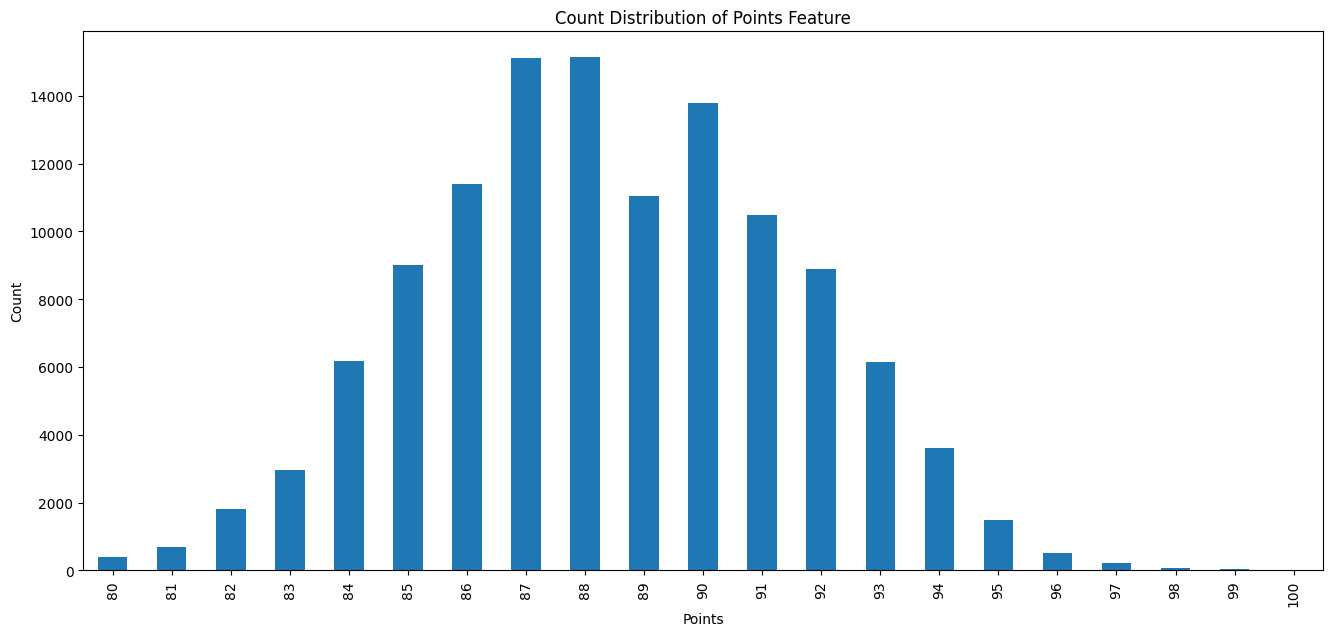

In [ ]:
# Distribution of points feature 
plt.figure(figsize=(16,7))
wine['points'].value_counts().sort_index().plot.bar()
plt.title("Count Distribution of Points Feature")
plt.ylabel('Count')
plt.xlabel('Points')

In [ ]:
#Pearson correlation between points and price
wine.corr()

<ipython-input-18-912b141e35eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()


,points,price
points,1.000000,0.416785
price,0.416785,1.000000


Text(0.5, 0, 'Points')

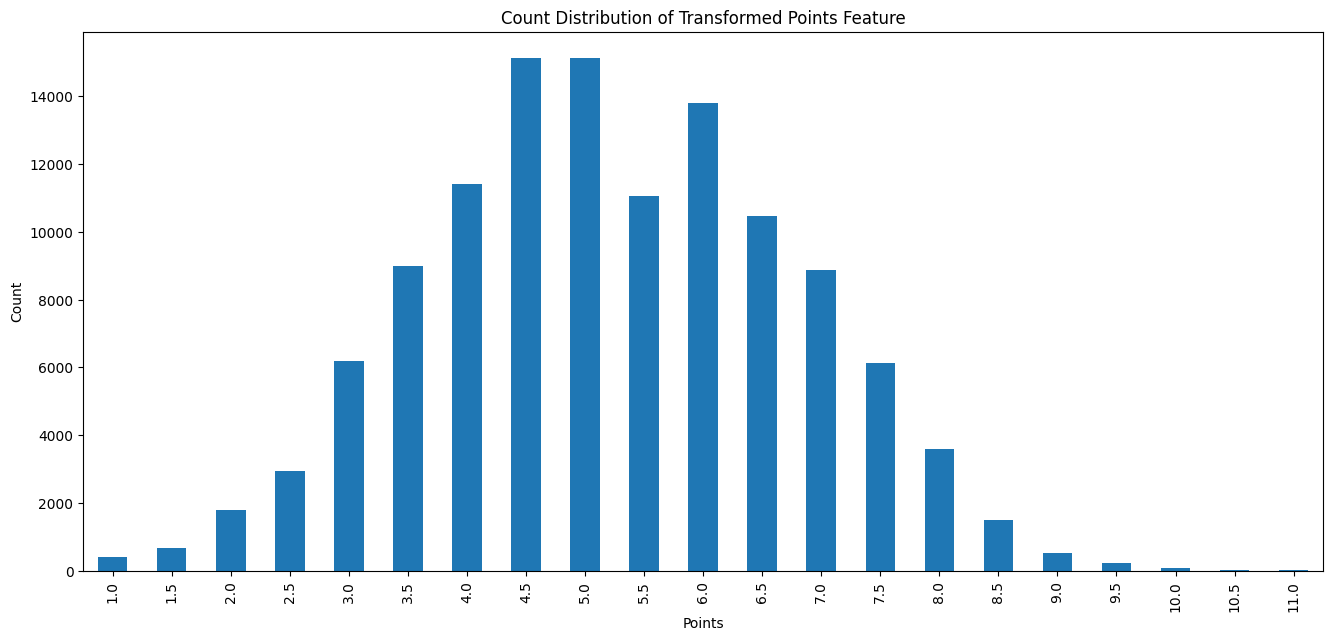

In [ ]:
# Transformation of points feature
wine['points_transformed'] = (wine['points'] - 80) * 0.5 + 1

#Distribution of re-scaled points
plt.figure(figsize=(16,7))
wine['points_transformed'].value_counts().sort_index().plot.bar()
plt.title("Count Distribution of Transformed Points Feature")
plt.ylabel('Count')
plt.xlabel('Points')

In [ ]:
#Pearson correlation after re-scaling points... it is the same as before (as it should be)
wine.corr()

<ipython-input-8-912b141e35eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()


,points,price,points_transformed
points,1.000000,0.416785,1.000000
price,0.416785,1.000000,0.416785
points_transformed,1.000000,0.416785,1.000000


In [ ]:
#Create a High vs. Low column to contain point range for potential future classification modeling 
#88 can be the high vs. low cutoff point since that is the median for this column

wine['point_range'] = np.where(wine['points'] > 88, "High", "Low")
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_transformed,point_range
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,4.5,Low
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,4.5,Low
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,4.5,Low
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,4.5,Low
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,4.5,Low


<Axes: xlabel='point_range', ylabel='count'>

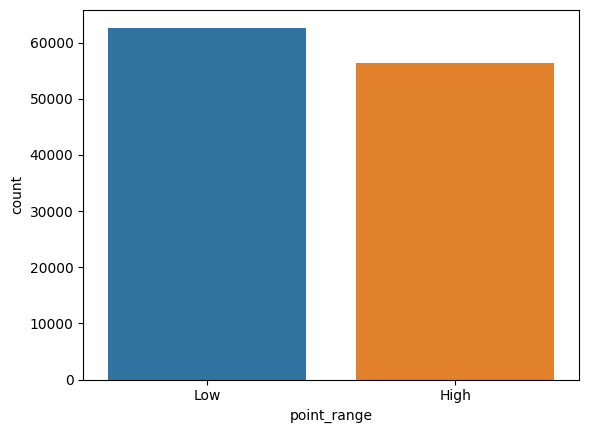

In [ ]:
#Distribution of High vs. Low rated wines - Balanced is good!
sns.countplot(x=wine["point_range"])

# **Price**

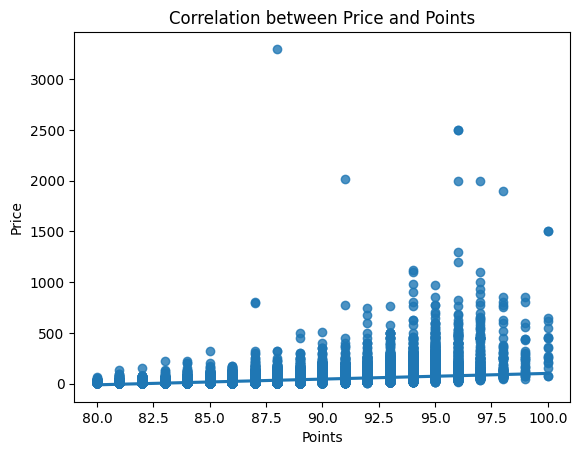

In [ ]:
sns.regplot(x='points', y='price', data=wine)
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Correlation between Price and Points')
plt.show()

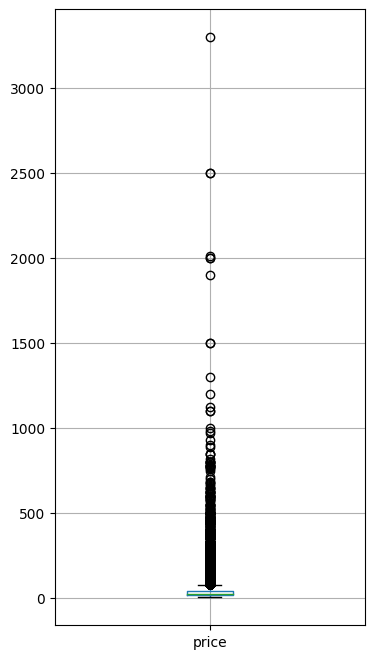

In [ ]:
#Very significant right skew and 'long tail' for price feature
wine.boxplot(column=['price'], figsize=(4,8));

In [ ]:
wine.price.describe()

count    110706.000000
mean         35.579445
std          41.882375
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

<ipython-input-26-78f7182c6599>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine.price)


<Axes: xlabel='price', ylabel='Density'>

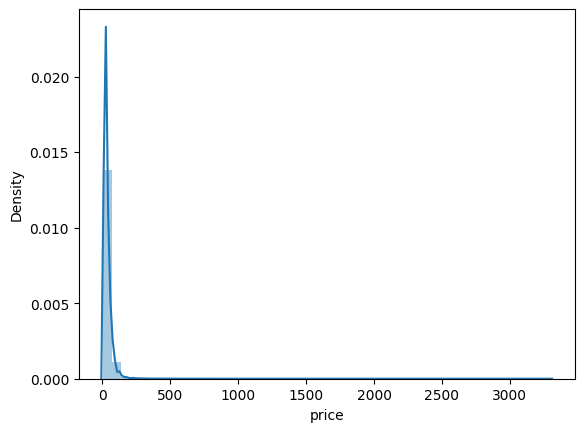

In [ ]:
sns.distplot(wine.price)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

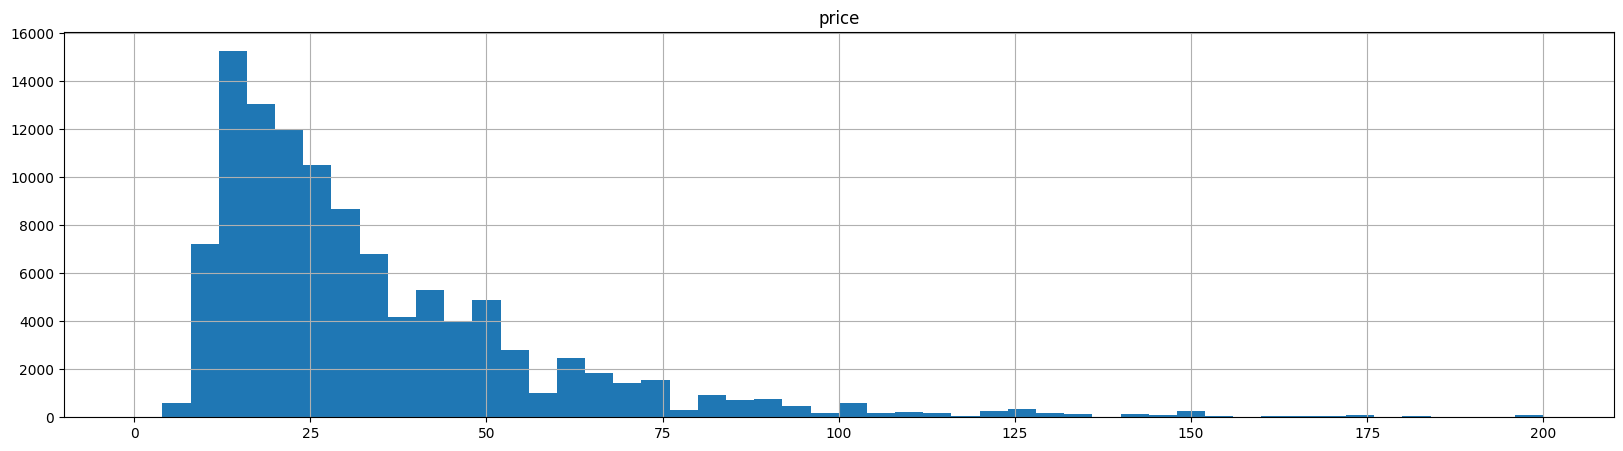

In [ ]:
wine.hist(column=['price'], figsize=(20,5), bins = 50, range=(0,200))

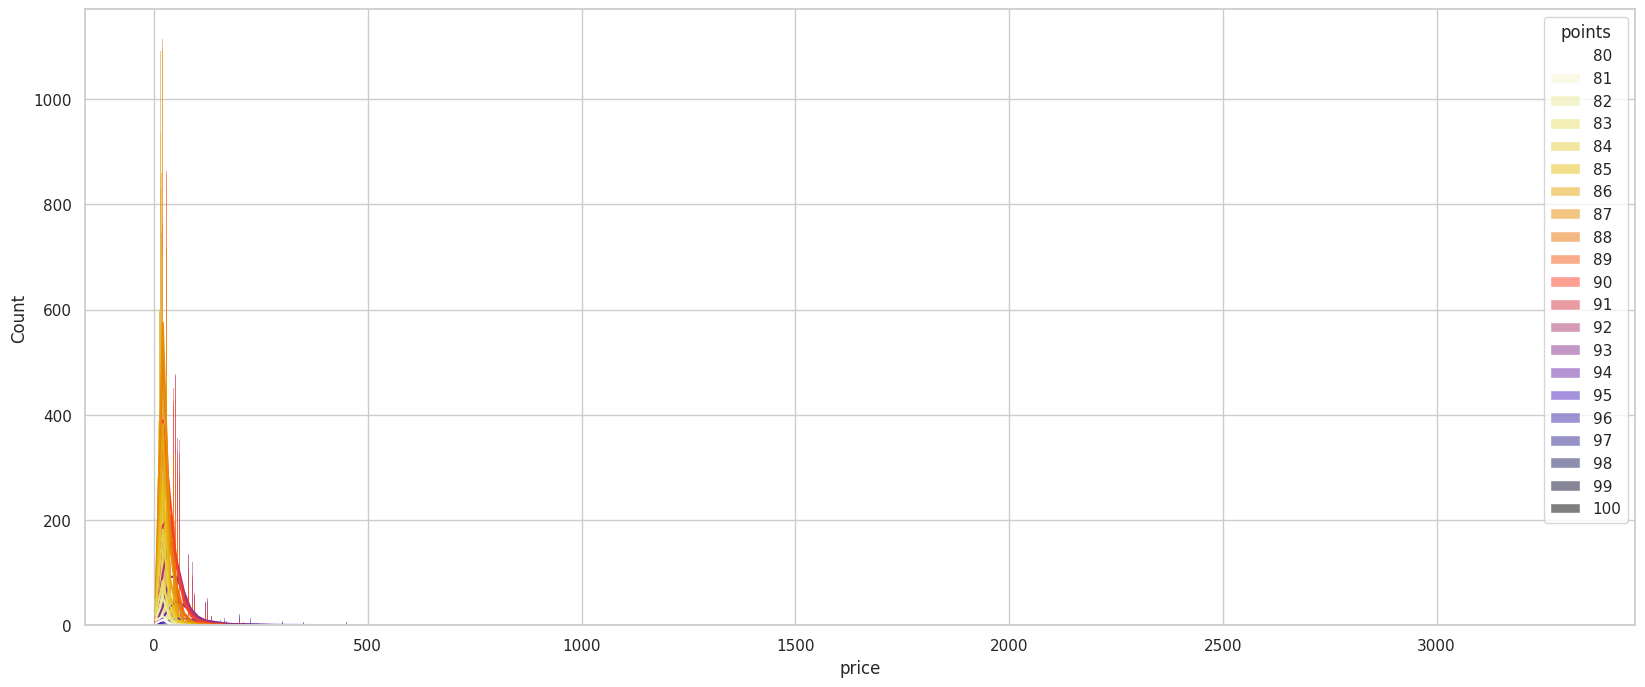

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")
sns.histplot(data=wine, x = "price", hue = wine["points"], kde = True, palette = 'CMRmap_r')
plt.ylabel("Count")
#the tplt.title('Distribution of Price per Bottle of Wine')
plt.show()
plt.clf()

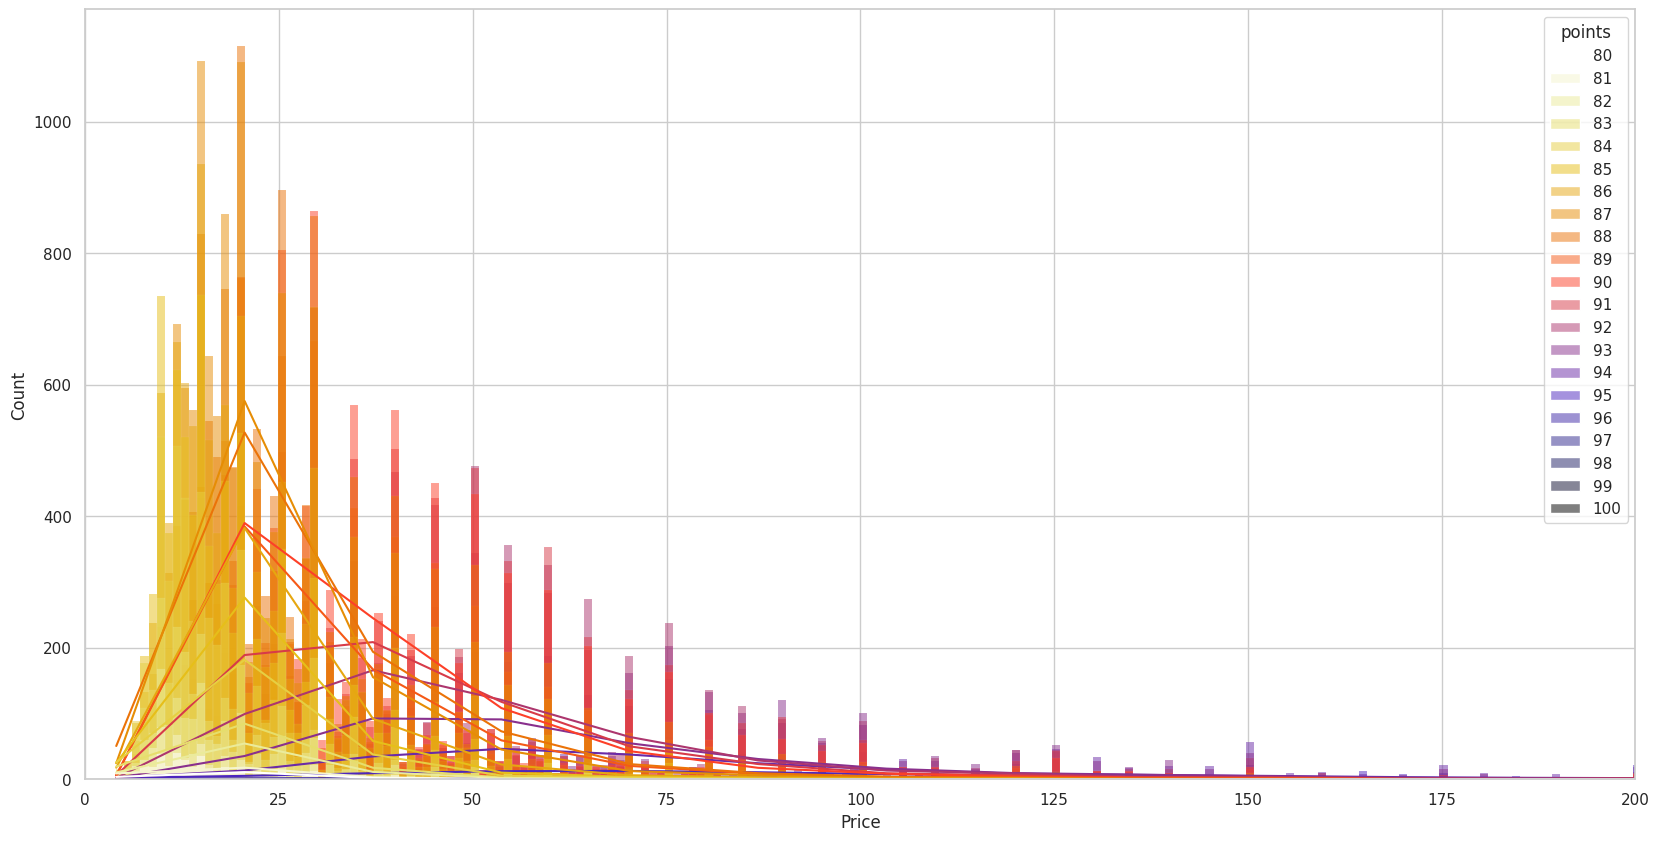

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,10))
sns.set_theme(style="whitegrid")
sns.histplot(data=wine, x = "price", hue = wine["points"], kde = True, palette = 'CMRmap_r')
plt.xlim(0,200)
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()
plt.clf()

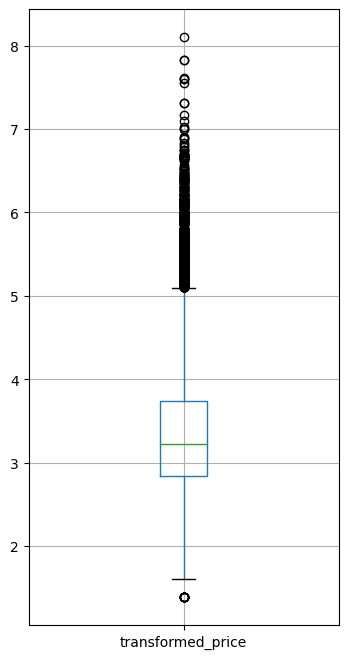

In [ ]:
#Create log transformed price column to handle the right skew
wine['transformed_price'] = np.log(wine.price)
wine.boxplot(column=['transformed_price'], figsize=(4,8));

In [ ]:
wine.transformed_price.describe()

count    110706.000000
mean          3.316541
std           0.658781
min           1.386294
25%           2.833213
50%           3.218876
75%           3.737670
max           8.101678
Name: transformed_price, dtype: float64

<ipython-input-32-49d24ca94344>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine.transformed_price)


<Axes: xlabel='transformed_price', ylabel='Density'>

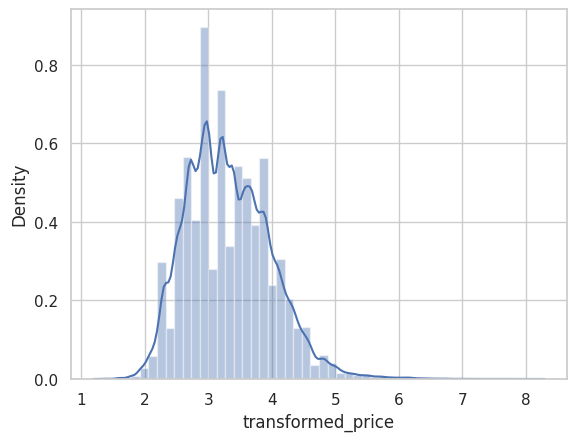

In [ ]:
#The distribution looks much more normal after log transformation
sns.distplot(wine.transformed_price)

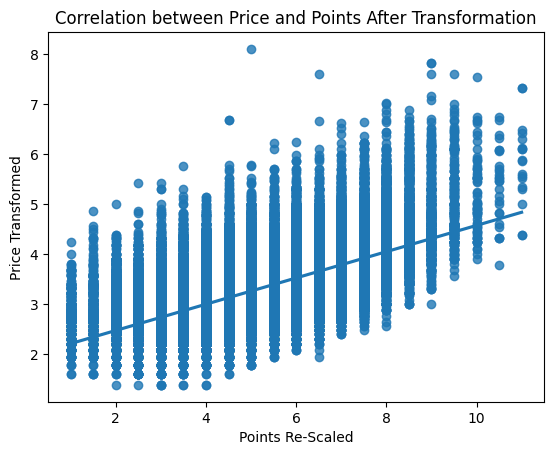

In [ ]:
sns.regplot(x='points_transformed', y='transformed_price', data=wine)
plt.xlabel('Points Re-Scaled')
plt.ylabel('Price Transformed')
plt.title('Correlation between Price and Points After Transformation')
plt.show()

In [19]:
#correlation between points_transformed and transformed_price is now 0.62 (better than the previous 0.42)
wine.corr()

<ipython-input-19-912b141e35eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()


,points,price,points_transformed,transformed_price
points,1.000000,0.416785,1.000000,0.617505
price,0.416785,1.000000,0.416785,0.727942
points_transformed,1.000000,0.416785,1.000000,0.617505
transformed_price,0.617505,0.727942,0.617505,1.000000


# **Country**

Text(0.5, 0, 'Country')

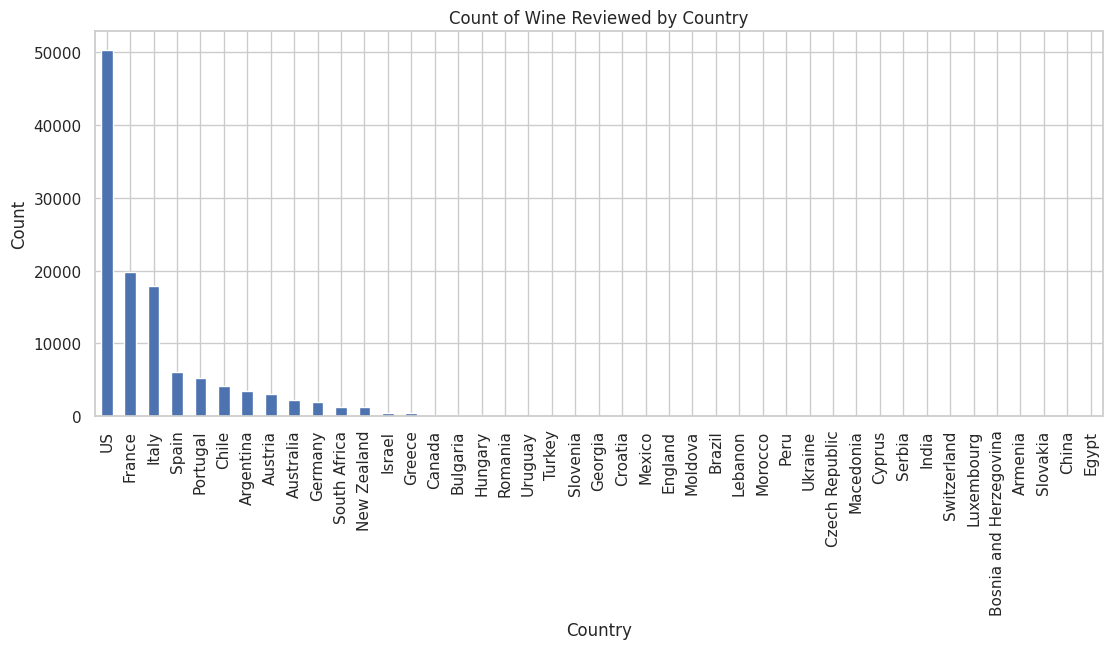

In [ ]:
plt.figure(figsize=(13,5))
wine['country'].value_counts().plot.bar()
plt.title("Count of Wine Reviewed by Country")
plt.ylabel('Count')
plt.xlabel('Country')

Text(0.5, 1.0, 'Distribution of Country')

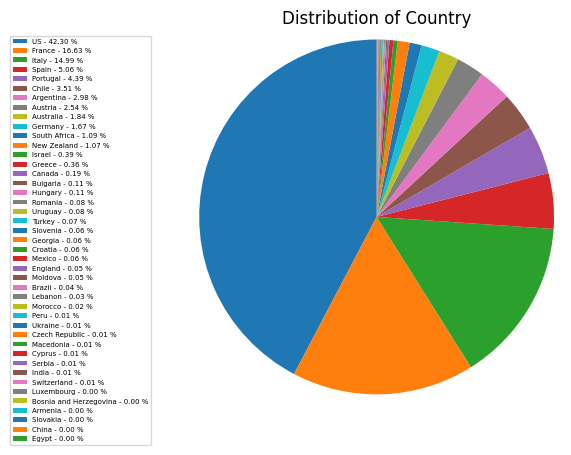

In [ ]:
values = wine.country.value_counts()
percents = wine.country.value_counts(normalize=True)
countries = values.keys()

patches, texts = plt.pie(values, startangle=90, radius=1.2)

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(countries,
percents*100)]

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=5)
plt.title('Distribution of Country')

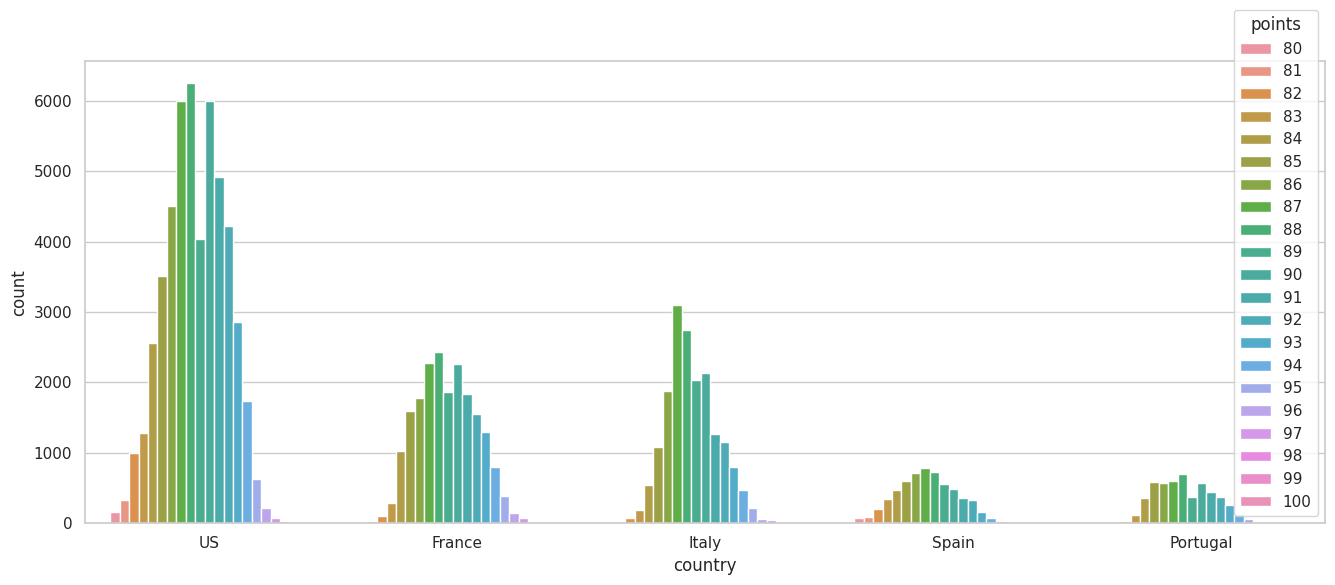

In [ ]:
wine_5countries = wine.groupby('country').filter(lambda x:len(x)>=5000)
plt.figure(figsize=(16,6))
sns.countplot(x="country",  hue="points", data=wine_5countries, order=wine_5countries['country'].value_counts().index);

<ipython-input-39-58910896b554>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country.mean().sort_values(by="points",ascending=False)["points"].plot.bar()


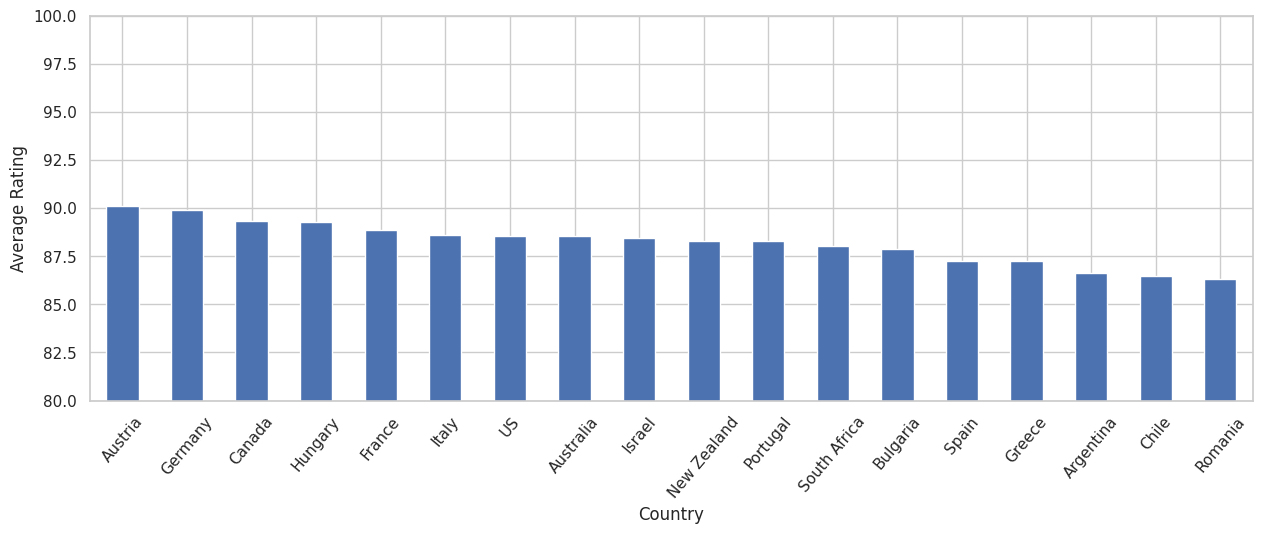

In [ ]:
countries_100reviews = wine.groupby("country").filter(lambda x:len(x)>=100)
country = countries_100reviews.groupby("country")

plt.figure(figsize=(15,5))
country.mean().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.ylim([80, 100])
plt.show()

# **Province**

In [ ]:
print("Number of unique provinces:", wine.province.nunique())
wine.province.value_counts()[:10]

Number of unique provinces: 425


California          33525
Washington           7953
Bordeaux             5400
Tuscany              5387
Oregon               4921
Burgundy             3599
Northern Spain       3547
Piedmont             3427
Mendoza Province     3037
New York             2454
Name: province, dtype: int64

Text(0.5, 0, 'Province')

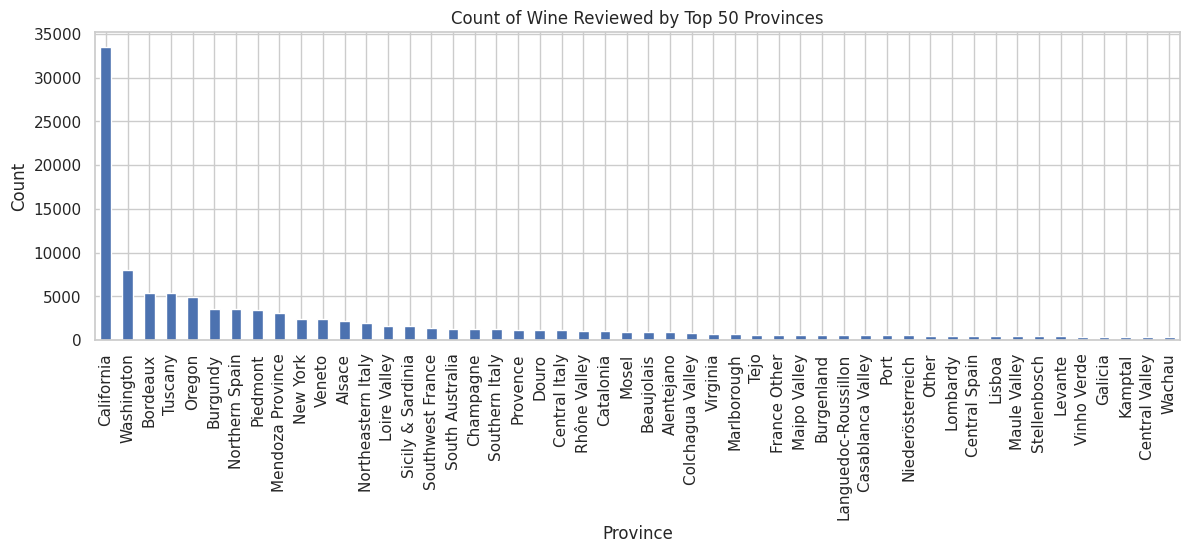

In [ ]:
plt.figure(figsize=(14,4))
wine['province'].value_counts()[:50].plot.bar()
plt.title("Count of Wine Reviewed by Top 50 Provinces")
plt.ylabel('Count')
plt.xlabel('Province')

# **Region_1 and Region_2**

In [ ]:
print("Number of unique region_1:", wine.region_1.nunique())
wine.region_1.value_counts()

Number of unique region_1: 1229


Napa Valley                                 4166
Columbia Valley (WA)                        3787
Russian River Valley                        2856
California                                  2430
Mendoza                                     2151
                                            ... 
Vin de Pays de la Haute Vallée du Gassac       1
Mâcon-Pierreclos                               1
Lamezia                                        1
Trentino Superiore                             1
Paestum                                        1
Name: region_1, Length: 1229, dtype: int64

In [ ]:
print("Number of unique region_2:", wine.region_2.nunique())
wine.region_2.value_counts()

Number of unique region_2: 17


Central Coast        10199
Sonoma                8370
Columbia Valley       7456
Napa                  6354
Willamette Valley     3140
California Other      2461
Finger Lakes          1640
Sierra Foothills      1345
Napa-Sonoma           1078
Central Valley         991
Southern Oregon        835
Oregon Other           670
Long Island            609
North Coast            529
Washington Other       495
South Coast            249
New York Other         205
Name: region_2, dtype: int64

In [ ]:
#Region_2 is a subcategory of province only for 4 U.S. states (which also happen to be some of the most common regions)
wine.groupby(["province", "region_2"]).size()

province    region_2         
California  California Other      2461
            Central Coast        10199
            Central Valley         991
            Napa                  6354
            Napa-Sonoma           1078
            North Coast            529
            Sierra Foothills      1345
            Sonoma                8370
            South Coast            249
New York    Finger Lakes          1640
            Long Island            609
            New York Other         205
Oregon      Oregon Other           670
            Southern Oregon        835
            Willamette Valley     3140
Washington  Columbia Valley       7456
            Washington Other       495
dtype: int64

# **Create Feature - Location**

In [ ]:
#Combine province and region_2 (for US states) to get location feature

#Create location column as duplicate of province to start
wine['location'] = wine.loc[:, 'province']

#For U.S states with region_2 we will assign this as the location
wine.loc[(wine['country']=='US') & (wine['region_2'].notnull()), 'location'] = wine['region_2']

In [ ]:
#Much more balanced than just using 'Province' on its own
print("Number of unique location:", wine.location.nunique())
wine.location.value_counts()

Number of unique location: 440


Central Coast      10199
Sonoma              8370
Columbia Valley     7456
Napa                6354
Bordeaux            5400
                   ...  
Markopoulo             1
Muzla                  1
Krania Olympus         1
Corinthia              1
Neuchâtel              1
Name: location, Length: 440, dtype: int64

Text(0.5, 0, 'Location')

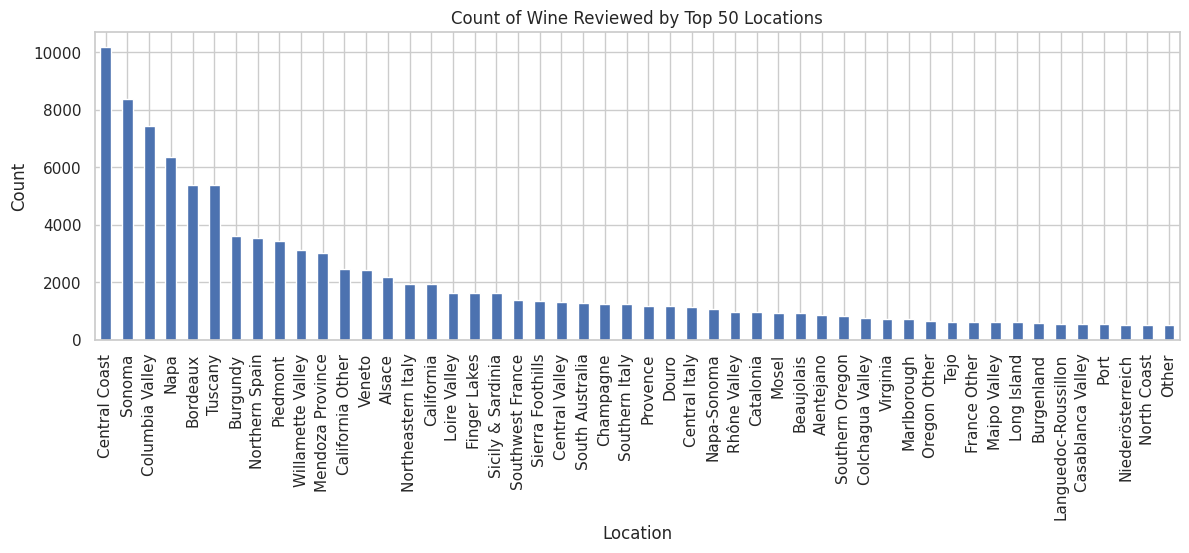

In [ ]:
plt.figure(figsize=(14,4))
wine['location'].value_counts()[:50].plot.bar()
plt.title("Count of Wine Reviewed by Top 50 Locations")
plt.ylabel('Count')
plt.xlabel('Location')

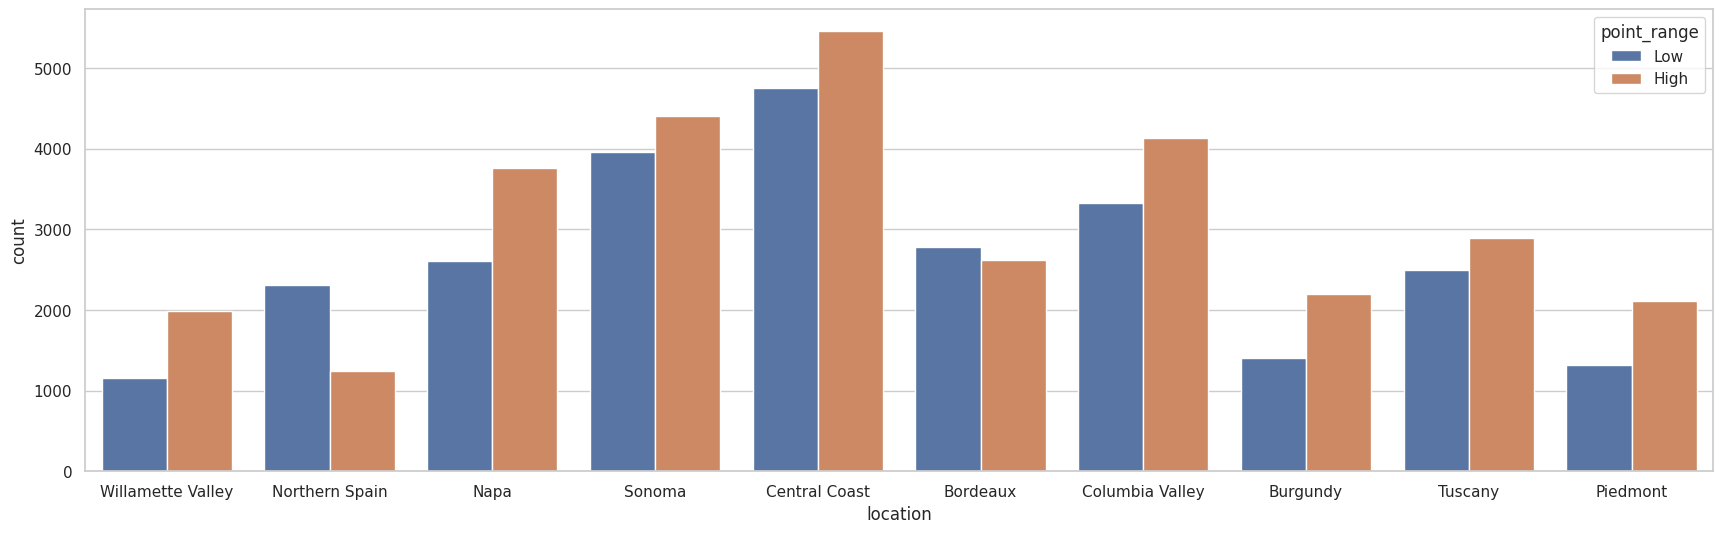

In [ ]:
location_filter = wine.groupby('location').filter(lambda x:len(x)>=3140)

plt.figure(figsize=(21,6))
sns.countplot(x="location", hue="point_range", data=location_filter)
plt.show()

# **Variety**

In [ ]:
wine.variety.value_counts()[:10]

Pinot Noir                  12200
Chardonnay                  10784
Cabernet Sauvignon           8827
Red Blend                    8225
Bordeaux-style Red Blend     6381
Riesling                     4760
Sauvignon Blanc              4547
Syrah                        3825
Rosé                         3216
Merlot                       2890
Name: variety, dtype: int64

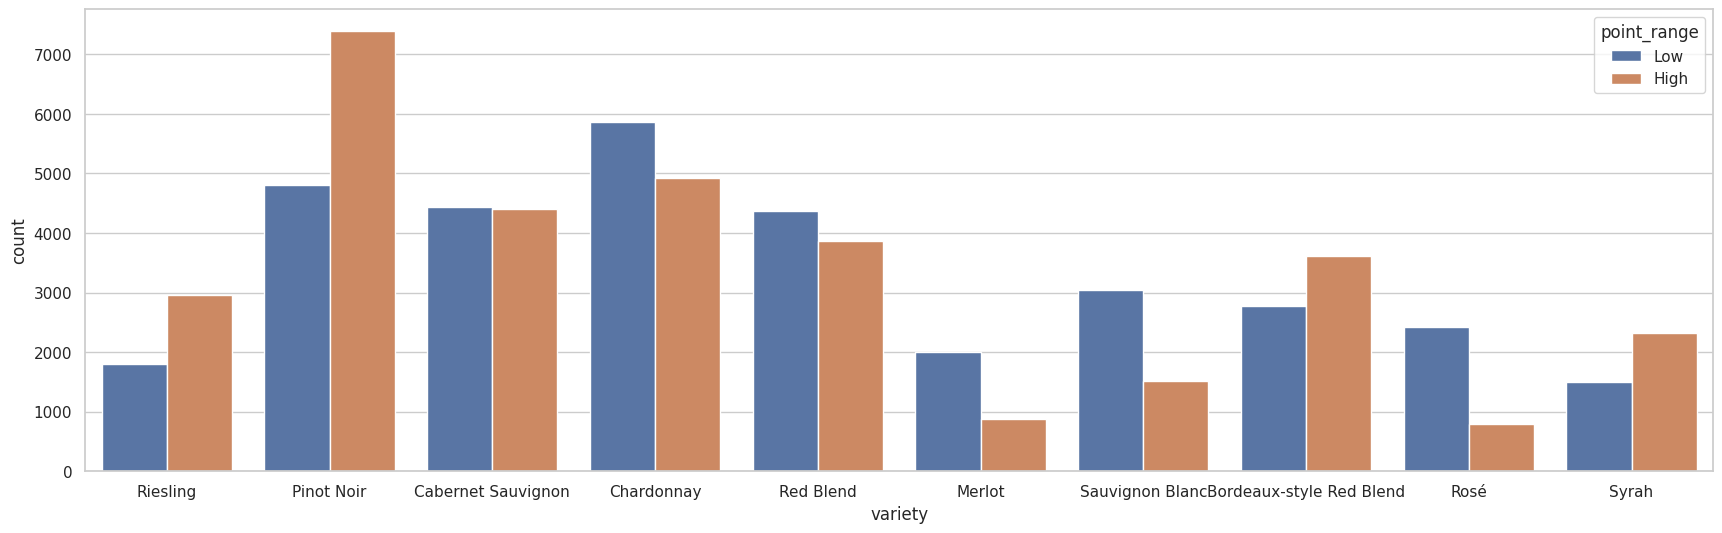

In [ ]:
variety_filter = wine.groupby('variety').filter(lambda x:len(x)>=2890)

plt.figure(figsize=(21,6))
sns.countplot(x="variety", hue="point_range", data=variety_filter)
plt.show()

# **Description**

In [ ]:
wine['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [ ]:
exclusions = set(['a',
'about',
'above',
'after',
'again',
'against',
'all',
'also',
'am',
'an',
'and',
'any',
'are',
"arent",
'as',
'at',
'be',
'because',
'been',
'before',
'being',
'below',
'between',
'both',
'but',
'by',
'can',
"cant",
'cannot',
'com',
'could',
"couldnt",
'did',
"didnt",
'do',
'does',
"doesnt",
'doing',
"dont",
'down',
'during',
'each',
'else',
'ever',
'few',
'for',
'from',
'further',
'get',
'had',
"hadnt",
'has',
"hasnt",
'have',
"havent",
'having',
'he',
"hed",
"hell",
"hes",
'hence',
'her',
'here',
"heres",
'hers',
'herself',
'him',
'himself',
'his',
'how',
"hows",
'however',
'http',
'i',
"id",
"ill",
"im",
"ive",
'if',
'in',
'into',
'is',
"isnt",
'it',
'its',
'itself',
'just',
'k',
"lets",
'like',
'me',
'more',
'most',
"mustnt",
'my',
'myself',
'no',
'nor',
'not',
'now',                
'of',
'off',
'on',
'once',
'only',
'or',
'other',
'otherwise',
'ought',
'our',
'ours',
'ourselves',
'out',
'over',
'own',
'r',
'same',
'shall',
"shant",
'she',
"shed",
"shell",
"shes",
'should',
"shouldnt",
'since',
'so',
'some',
'such',
'than',
'that',
"thats",
'the',
'their',
'theirs',
'them',
'themselves',
'then',
'there',
"theres",
'therefore',
'these',
'they',
"theyd",
"theyll",
"theyre",
"theyve",
'this',
'those',
'through',
'to',
'too',
'under',
'until',
'up',
'very',
'was',
"wasnt",
'we',
"wed",
"well",
"were",
"weve",
"werent",
'what',
"whats",
'when',
"whens",
'where',
"wheres",
'which',
'while',
'who',
"whos",
'whom',
'why',
"whys",
'with',
"wont",
'would',
"wouldnt",
'www',
'you',
"youd",
"youll",
"youre",
"youve",
'your',
'yours',
'yourself',
'yourselves'])

In [ ]:
import string

def clean_description(x):
    if isinstance(x, str):
        x = x.lower()
        x = x.translate(str.maketrans('', '', string.punctuation))
        x = x.split()
        final_lst = []
        for word in x:
            if word not in exclusions:
                final_lst.append(word)
        return final_lst
    else:
        return []

In [ ]:
#clean the description of each wine to isolate every word
wine['description'] = wine['description'].apply(clean_description)

#check to see if description is cleaned as expected
wine[['description']].head()

,description
0,"[aromas, include, tropical, fruit, broom, brim..."
1,"[ripe, fruity, wine, smooth, still, structured..."
2,"[tart, snappy, flavors, lime, flesh, rind, dom..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, regular, bottling, 2012, comes, across,..."


In [ ]:
#number of reviews each word is contained (counted only once per review, not more than once if used twice in same review)
print("Number of unique keywords:", len(pd.Series([x for item in wine.description for x in set(item)]).value_counts()))
pd.Series([x for item in wine.description for x in set(item)]).value_counts()[:50]

Number of unique keywords: 46638


wine          57658
flavors       54638
fruit         37224
aromas        35621
palate        33820
finish        31692
acidity       30895
tannins       27449
drink         26938
cherry        23577
ripe          23038
black         20012
spice         16515
notes         16371
red           15365
rich          15285
nose          15194
fresh         14535
oak           14244
dry           13643
berry         13022
soft          12036
plum          11917
blend         11761
fruits        11720
crisp         11231
offers        11230
blackberry    11151
texture       11093
sweet         10924
apple         10518
shows         10386
white         10091
citrus         9833
light          9822
dark           9685
bright         9639
vanilla        9437
full           8806
juicy          8783
pepper         8707
fruity         8372
raspberry      8319
good           8299
cabernet       8232
firm           8186
green          7673
touch          7510
chocolate      7469
peach          7419


In [ ]:
#total occurrence of each word in the entire dataset (counting multiple occurrences in single review)
pd.Series([x for item in wine.description for x in item]).value_counts()[:50]

wine          71286
flavors       57527
fruit         41240
aromas        36070
palate        34548
finish        31927
acidity       31662
tannins       28290
drink         27231
cherry        25082
ripe          24491
black         23285
notes         17367
spice         17211
red           17171
rich          15870
oak           15368
nose          15364
fresh         15319
berry         14193
dry           14094
plum          12893
soft          12364
fruits        12240
blend         11948
blackberry    11707
sweet         11516
apple         11514
crisp         11461
offers        11439
texture       11249
white         11149
shows         10616
dark          10415
light         10379
citrus        10269
bright         9893
vanilla        9784
cabernet       9712
full           9138
pepper         9084
juicy          8899
good           8744
raspberry      8551
fruity         8529
firm           8372
green          8287
peach          7718
touch          7709
chocolate      7669


In [ ]:
low_point_wine = wine[wine["point_range"] == "Low"]
low_point_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_transformed,point_range,transformed_price,location
0,Italy,"[aromas, include, tropical, fruit, broom, brim...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,4.5,Low,NaN,Sicily & Sardinia
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,4.5,Low,2.708050,Douro
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,4.5,Low,2.639057,Willamette Valley
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,4.5,Low,2.564949,Michigan
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,4.5,Low,4.174387,Willamette Valley


In [ ]:
#create list of unique words per each low points review
low_point_words = pd.Series([x for item in low_point_wine.description for x in set(item)])

In [ ]:
low_point_words.value_counts()[:20]

flavors    30825
wine       28373
aromas     19972
fruit      18196
finish     17061
palate     16694
acidity    15950
tannins    11834
drink      11755
cherry     11283
ripe        9800
red         8190
fresh       8150
notes       8124
soft        7884
nose        7602
dry         7514
black       7390
spice       7184
oak         7151
dtype: int64

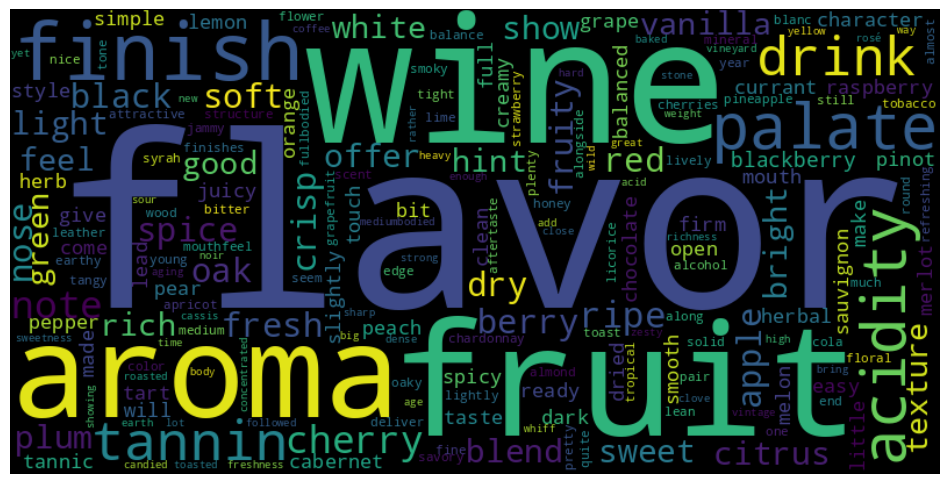

In [ ]:
low_point_wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, collocations=False).generate(' '.join(list(low_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(low_point_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
high_point_wine = wine[wine["point_range"] == "High"]
high_point_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_transformed,point_range,transformed_price,location
119,France,"[mediumgold, color, complex, inviting, nose, l...",Schoenenbourg Grand Cru Vendanges Tardives,92,80.0,Alsace,Alsace,NaN,NaN,NaN,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Riesling,Dopff & Irion,7.0,High,4.382027,Alsace
120,Italy,"[slightly, backward, particularly, given, vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto,7.0,High,4.248495,Piedmont
121,US,"[vineyard, one, better, chardonnay, sources, a...",Stuhlmuller Vineyard,92,36.0,California,Alexander Valley,Sonoma,NaN,NaN,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,Chardonnay,Matrix,7.0,High,3.583519,Sonoma
122,US,"[defines, rockpile, zinfandel, intensity, frui...",Rockpile Cemetary Vineyard,92,39.0,California,Rockpile,Sonoma,NaN,NaN,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Zinfandel,Mauritson,7.0,High,3.663562,Sonoma
123,Australia,"[blend, roughly, twothirds, shiraz, onethird, ...",Parson's Flat,92,40.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 Parson's Flat Shi...,Shiraz-Cabernet Sauvignon,Henry's Drive Vignerons,7.0,High,3.688879,South Australia


In [ ]:
high_point_words = pd.Series([x for item in high_point_wine.description for x in set(item)])

In [ ]:
high_point_words.value_counts()[:20]

wine          29285
flavors       23813
fruit         19028
palate        17126
aromas        15649
tannins       15615
drink         15183
acidity       14945
finish        14631
ripe          13238
black         12622
cherry        12294
rich          10235
spice          9331
notes          8247
nose           7592
red            7175
oak            7093
dark           6512
blackberry     6466
dtype: int64

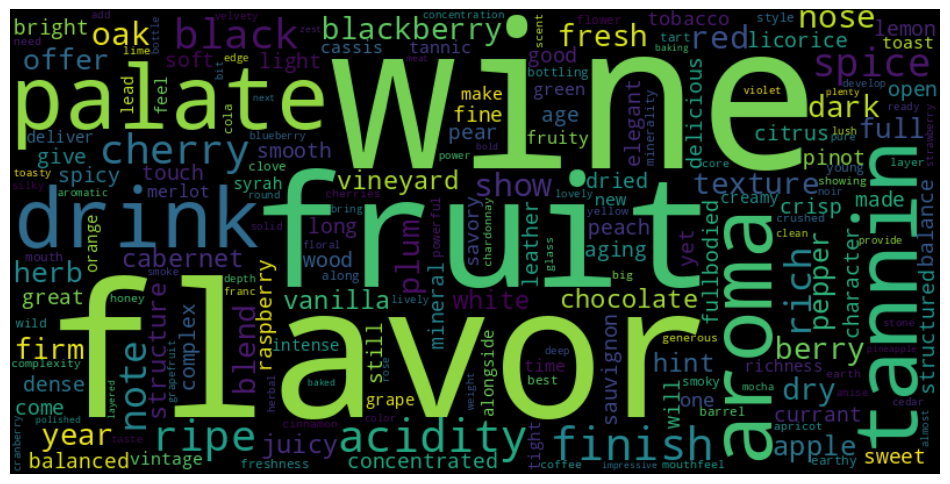

In [ ]:
high_point_wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, collocations=False).generate(' '.join(list(high_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(high_point_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Experimenting with adding some stop words
stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavor", "fruit", "aroma", "tannin", "palate", "acidity", "flavors", "aromas", "tannins", "drink", "finish", 
                  "ripe", "spice", "notes", "cherry", "red", "black"])

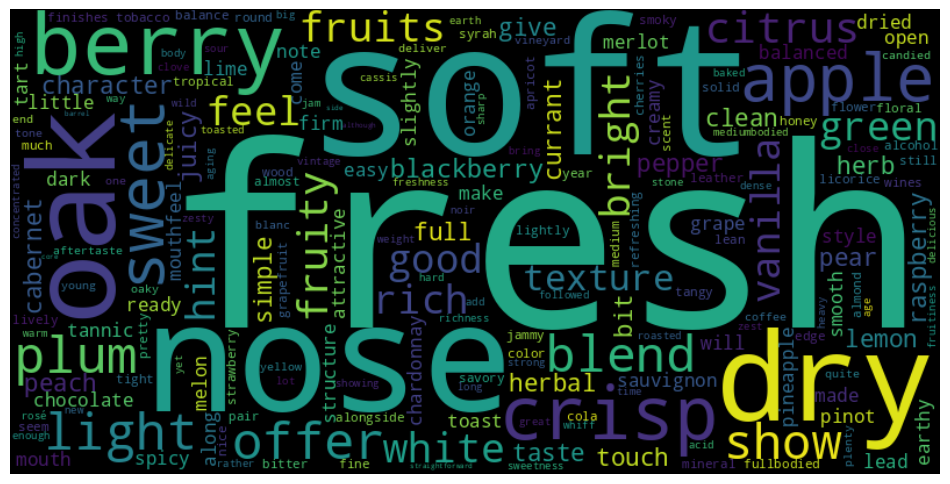

In [ ]:
low_point_wordcloud2 = WordCloud(stopwords=stopwords, width=800, height=400, collocations=False).generate(' '.join(list(low_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(low_point_wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

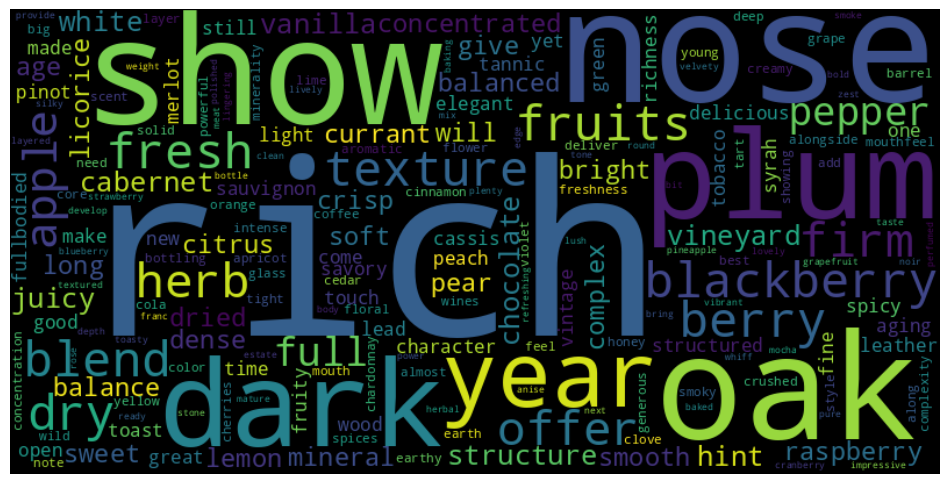

In [ ]:
high_point_wordcloud2 = WordCloud(stopwords=stopwords, width=800, height=400, collocations=False).generate(' '.join(list(high_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(high_point_wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Designation**

In [ ]:
#Is designation usable? - Probably not... extremely large amount of unique values and values aren't standardized (reserve vs. reserva vs. riserva)
wine.designation.value_counts()

Reserve                                1870
Estate                                 1220
Reserva                                1175
Riserva                                 646
Estate Grown                            565
                                       ... 
Domaine des Vercheres                     1
Gala 3 Viognier-Chardonnay-Riesling       1
Buissonier                                1
Egalité                                   1
Lieu-dit Harth Cuvée Caroline             1
Name: designation, Length: 37979, dtype: int64

In [ ]:
#Very very many single value occurrences -> This won't be useful
len(wine.groupby("designation").filter(lambda x:len(x)==1))

25154

# **Winery**

In [ ]:
#Winery may be more usable than designation... still a significant amount of unique values though
wine.winery.value_counts()

Wines & Winemakers    209
Williams Selyem       204
Testarossa            201
DFJ Vinhos            200
Louis Latour          190
                     ... 
Contour                 1
Aaldering               1
Angry Bunch             1
Patritti                1
Penedo Borges           1
Name: winery, Length: 16757, dtype: int64

In [ ]:
#Too many single value occurrences -> This won't be useful for regression/classification. Maybe constraint-based for experienced wine drinkers?
len(wine.groupby("winery").filter(lambda x:len(x)==1))

4595